In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam

In [ ]:
#LOAD DATA

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

<h3>PREPROCESSING<h3>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The data pixel values must fall in the range of 0 to 255.

In [ ]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

<h3>MODEL<h3>

I create 2 different model for fashion dataset.

I used Sequential Model because of network is a consists of a linear stack of layers.

First Model is three layers model;

In [ ]:
def my_model1():
    #Sequential Constructor
    model = Sequential()
    
    #Layers
    model.add(Flatten(input_shape = (28,28)))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(10, activation = "Softmax"))
    return model
    

Second Model is six layers model;

In [ ]:
def my_model2():
    #Sequential Constructor
    model = Sequential()
    
    #Layers
    model.add(Flatten(input_shape = (28,28)))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(10, activation = "softmax"))
    
    return model

Here example model in geeksforgeeks.org for comparing
[link](https://www.geeksforgeeks.org/fashion-mnist-with-python-keras-and-deep-learning/)

In [ ]:
def model_comp():
    
    model = Sequential()
    
    model.add(Conv2D(64, (5,5), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(128, (5,5), padding = "same", activation = "relu"))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(256, (5,5), padding = "same", activation = "relu"))

    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    
    model.add(Dense(10, activation = "softmax"))
    return model

In [ ]:
learning_rate = 0.0001

my_model1 = my_model1()

my_model1.compile(optimizer = Adam(learning_rate = learning_rate), loss ="sparse_categorical_crossentropy", metrics =["accuracy"])

my_model1.summary()

In [ ]:
#Model1 Fit
fitted_model1 = my_model1.fit(x_train, y_train, epochs=5, validation_split = 0.2)

In [ ]:
my_model2 = my_model2()

my_model2.compile(optimizer = Adam(learning_rate = learning_rate), loss ="sparse_categorical_crossentropy", metrics =["accuracy"])

my_model2.summary()

In [ ]:
#Model2 Fit
fitted_model2 = my_model2.fit(x_train, y_train, epochs=5, validation_split = 0.2)

In [ ]:
model_comp = model_comp()

model_comp.compile(optimizer = Adam(learning_rate = learning_rate), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model_comp.summary()

In [ ]:
#Geek's Model Fit
fitted_modelG = model_comp.fit(x_train, y_train, epochs=5, validation_split = 0.2)

Evaluate


In [ ]:
#Evaluate Model 1
test_loss_1, test_acc_1 = my_model1.evaluate(x_test, y_test)

#Evaluate Model 2
test_loss_2, test_acc_2 = my_model2.evaluate(x_test, y_test)

#Evaluate Geek's Model
test_loss_g, test_acc_g = model_comp.evaluate(x_test, y_test)

<h2>Plot Losses<h2>

In [ ]:
def plot_loss(model):
    plt.plot(model['loss'], 'red')
    plt.plot(model['val_loss'], 'orange')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val_loss'], loc = 2)

In [ ]:
#Model 1 - Loss and Loss Value
plot_loss(fitted_model1.history)

In [ ]:
def plot_accuracy(model):
    plt.plot(model['accuracy'], 'green')
    plt.plot(model['val_accuracy'], 'orange')
    plt.title('Model Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Epoch')
    plt.legend(['Train','Val_Accuracy'], loc = 2)

In [ ]:
#Model 1 Accuracy and Accuracy Value
plot_accuracy(fitted_model1.history)

In [ ]:
#Model 2 Loss and Val Loss
plot_loss(fitted_model2.history)


In [ ]:
#Model 2 Accuracy and Val Accuracy
plot_accuracy(fitted_model2.history)


In [ ]:
#Model Geek Loss and Val Loss
plot_loss(fitted_modelG.history)


In [ ]:
#Model Geek Accucary and Val Accuracy
plot_accuracy(fitted_modelG.history)

<h3>Prediction<h3>

In [ ]:
#Model 1
prediction_1= my_model1.predict(x_test)

#Model2
prediction_2 = my_model2.predict(x_test)

#Model 3
prediction_g = model_comp.predict(x_test)

<h3>Plot Images<h3>

Source for Plot Images: [link](https://www.tensorflow.org/tutorials/keras/classification)

In [72]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

<h3>Look Predictions<h3>

Three Layers Model

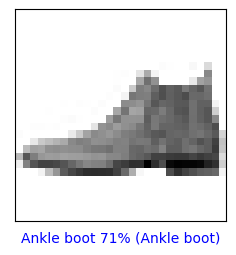

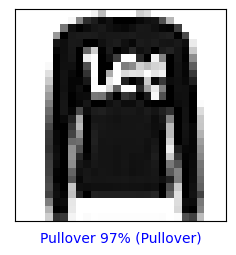

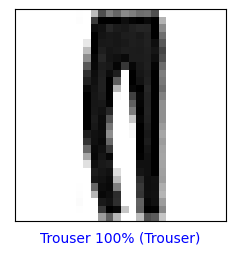

In [75]:
for i in range(0,3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, prediction_1, y_test, x_test)
    plt.show()

Six Layers Model

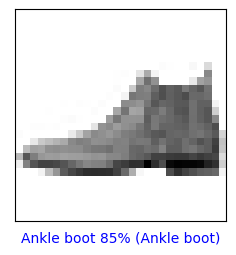

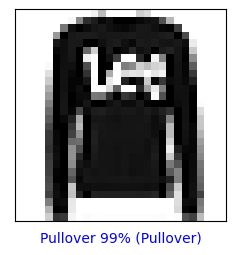

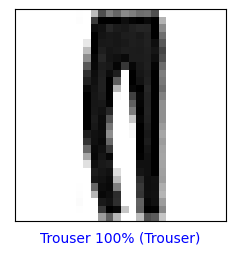

In [77]:
for i in range(0,3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, prediction_2, y_test, x_test)
    plt.show()

Geek's Model

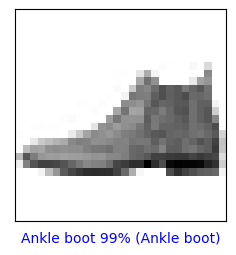

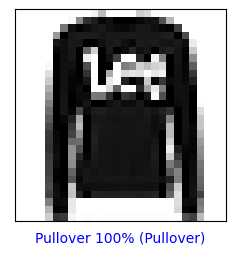

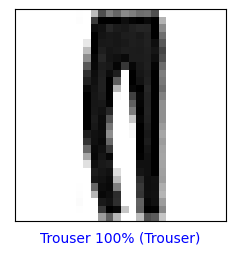

In [78]:
for i in range(0,3):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, prediction_g, y_test, x_test)
    plt.show()